# Transformada Z inversa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import sympy as sym
%matplotlib inline

In [2]:
z = sym.symbols('z')
k = sym.symbols('k',integer=True)

In [3]:
unitstep = sym.Sum(z**(-k),(k,0,sym.oo))
unitstep

Sum(z**(-k), (k, 0, oo))

In [4]:
shortform = unitstep.doit()
shortform

Piecewise((1/(1 - 1/z), 1/Abs(z) < 1), (Sum(z**(-k), (k, 0, oo)), True))

In [5]:
uz = shortform.args[0][0]
uz

1/(1 - 1/z)

In [6]:
q = sym.symbols('q')
uq = uz.subs({z: q**(-1)})
uq

1/(1 - q)

In [7]:
N = 10
qpoly = sym.Poly(uq.series(q,0,N).removeO(),q)
un = list(reversed(qpoly.all_coeffs()))
un

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

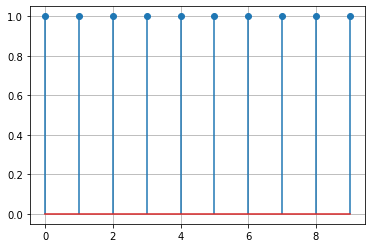

In [8]:
fig = plt.figure(1)
plt.stem(np.array(un,dtype='float'))
plt.grid()

In [9]:
a, b = sym.symbols('a,b')
Hz = b / (1+a*z**(-1))
Hz.cancel()

b*z/(a + z)

In [10]:
Hq = Hz.subs({z: q**(-1)})
Hq

b/(a*q + 1)

In [11]:
Hq1 = Hq.subs({a:sym.Rational(-1/2),b:2})
Hq1.cancel()

-4/(q - 2)

In [12]:
N = 10
qpoly = sym.Poly(Hq1.series(q,0,N).removeO(),q)
hn1 = list(reversed(qpoly.all_coeffs()))
hn1

[2, 1, 1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256]

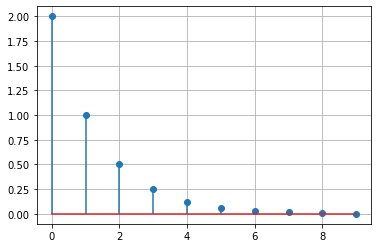

In [13]:
fig = plt.figure(2)
plt.stem(np.array(hn1,dtype='float'))
plt.grid()

In [14]:
Xz = 1/(1-sym.Rational(3/2)*z**(-1)+sym.Rational(1/2)*z**(-2))
Xz

1/(1 - 3/(2*z) + 1/(2*z**2))

In [15]:
Xq = Xz.subs({z:q**(-1)})
Xq.cancel()

2/(q**2 - 3*q + 2)

In [16]:
N = 10
qpoly = sym.Poly(Xq.series(q,0,N).removeO(),q)
xn = list(reversed(qpoly.all_coeffs()))
xn

[1, 3/2, 7/4, 15/8, 31/16, 63/32, 127/64, 255/128, 511/256, 1023/512]

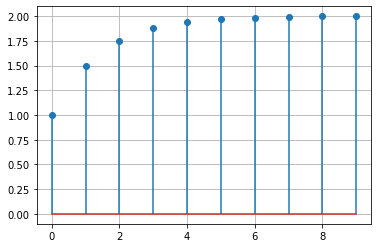

In [17]:
fig = plt.figure(3)
plt.stem(np.array(xn,dtype=float))
plt.grid()

In [18]:
N = 15
n = np.arange(N)-(N-1)
zpoly = sym.Poly(Xz.series(z,0,N).removeO(),z)
xn = list(zpoly.all_coeffs())
xn

[16382, 8190, 4094, 2046, 1022, 510, 254, 126, 62, 30, 14, 6, 2, 0, 0]

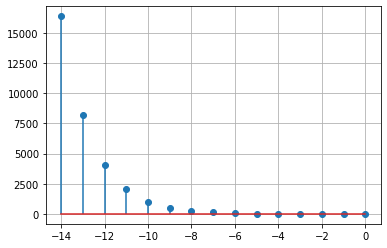

In [19]:
fig = plt.figure(4)
plt.stem(n,np.array(xn,dtype=float))
plt.grid()

In [20]:
Xz.series(z,0,N)

2*z**2 + 6*z**3 + 14*z**4 + 30*z**5 + 62*z**6 + 126*z**7 + 254*z**8 + 510*z**9 + 1022*z**10 + 2046*z**11 + 4094*z**12 + 8190*z**13 + 16382*z**14 + O(z**15)

In [21]:
Xz.series(z,0,N).removeO()

16382*z**14 + 8190*z**13 + 4094*z**12 + 2046*z**11 + 1022*z**10 + 510*z**9 + 254*z**8 + 126*z**7 + 62*z**6 + 30*z**5 + 14*z**4 + 6*z**3 + 2*z**2

In [22]:
sym.Poly(Xz.series(z,0,N).removeO(),z)

Poly(16382*z**14 + 8190*z**13 + 4094*z**12 + 2046*z**11 + 1022*z**10 + 510*z**9 + 254*z**8 + 126*z**7 + 62*z**6 + 30*z**5 + 14*z**4 + 6*z**3 + 2*z**2, z, domain='ZZ')

In [23]:
zpoly.all_coeffs()

[16382, 8190, 4094, 2046, 1022, 510, 254, 126, 62, 30, 14, 6, 2, 0, 0]